### AJ_0066.1 - Explorative analysis of 10x single cell data during reprogramming MEFs to iPSCs with STEMCCA casette

#### Run with R_scRNA_seq_XCR2 conda environment

In [1]:
library(dplyr)
library(Seurat)
library(readr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
setwd('/staging/leuven/stg_00041/Adrian/TALON_JANISZEWSKI_XCR2')

#### Import the data

In [3]:
# Load the 10X data

C4R.data <- Read10X(data.dir = "10X_Song/data/C4R/")
C5R.data <- Read10X(data.dir = "10X_Song/data/C5R/")

In [4]:
C4R <- CreateSeuratObject(counts = C4R.data, project = "C4R", min.cells = 3, min.features = 200)
C5R <- CreateSeuratObject(counts = C5R.data, project = "C5R", min.cells = 3, min.features = 200)
C4R
C5R

An object of class Seurat 
16544 features across 3356 samples within 1 assay 
Active assay: RNA (16544 features)

An object of class Seurat 
16943 features across 4123 samples within 1 assay 
Active assay: RNA (16943 features)

In [5]:
stemcca <- merge(x = C4R,
                   y = C5R,
                   add.cell.ids = c("C4R","C5R"),
                   project = "10x_stemcca")

In [6]:
stemcca

An object of class Seurat 
17408 features across 7479 samples within 1 assay 
Active assay: RNA (17408 features)

In [7]:
stemcca[["percent.mt"]] <- PercentageFeatureSet(stemcca, pattern = "^mt-")

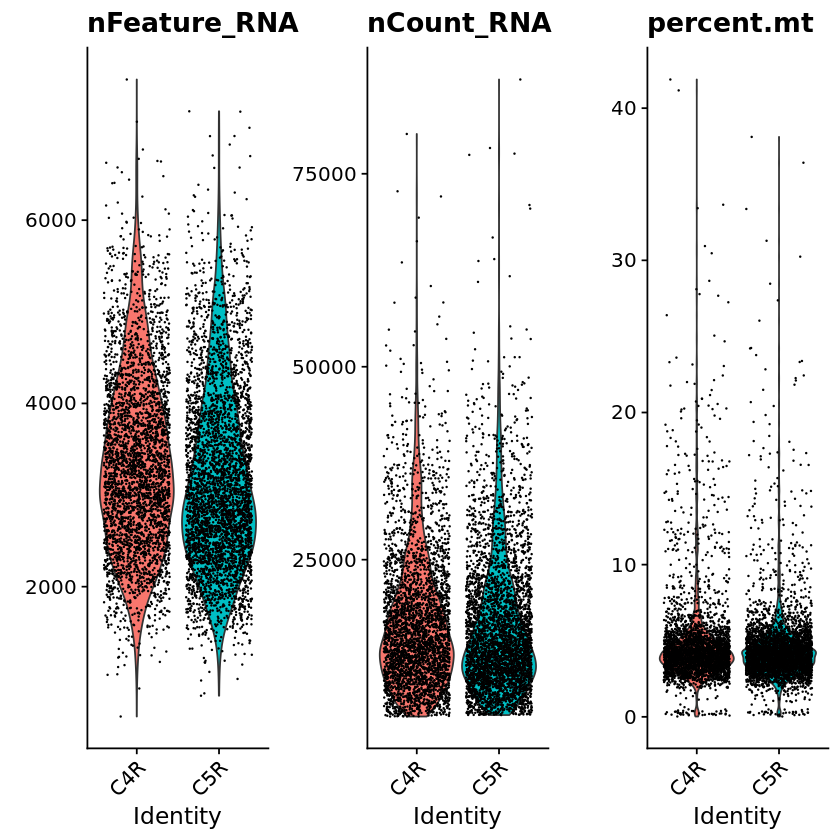

In [8]:
# Visualize QC metrics as a violin plot
VlnPlot(stemcca, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, pt.size =.05)

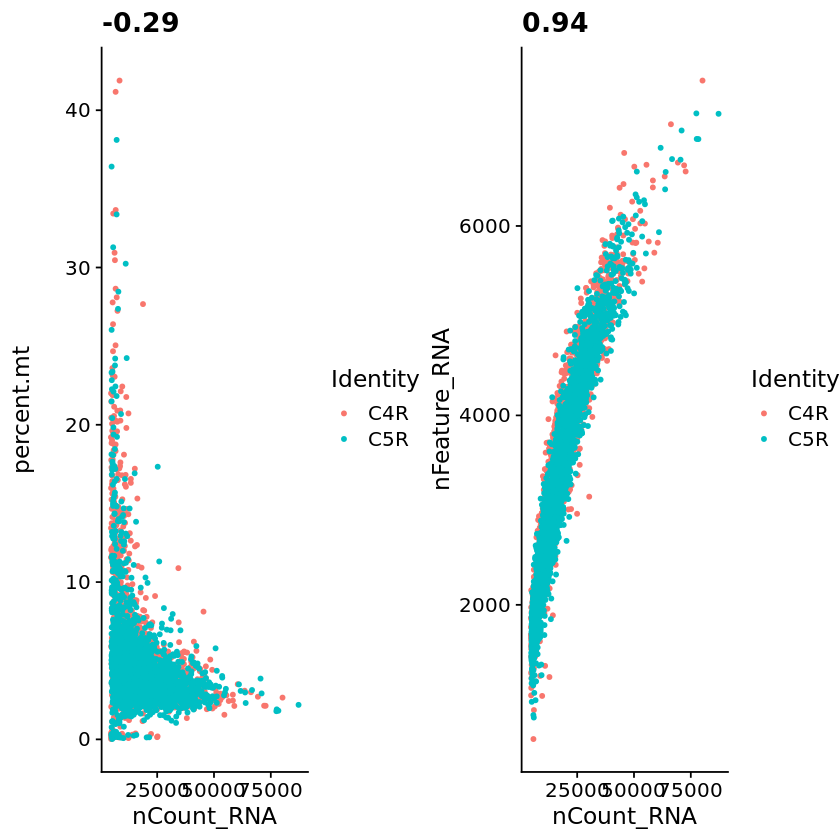

In [9]:
plot1 <- FeatureScatter(stemcca, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(stemcca, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

In [10]:
stemcca <- subset(stemcca, subset = nFeature_RNA > 1500 & nFeature_RNA < 6000 & percent.mt < 9 & nCount_RNA > 2000)

In [11]:
stemcca <- NormalizeData(stemcca, normalization.method = "LogNormalize", scale.factor = 10000)

When using repel, set xnudge and ynudge to 0 for optimal results


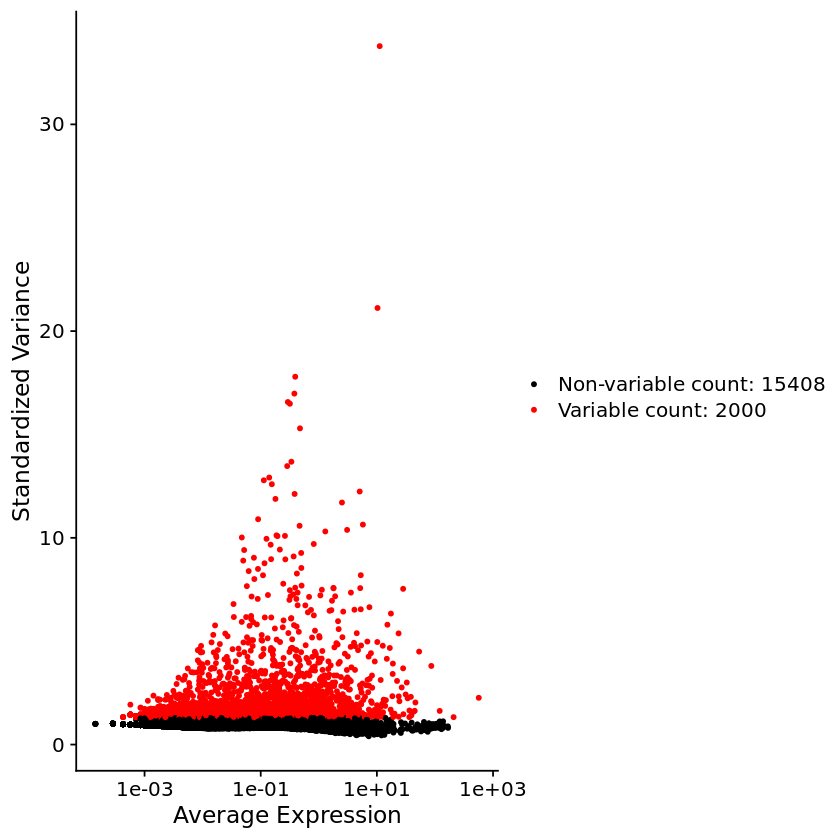

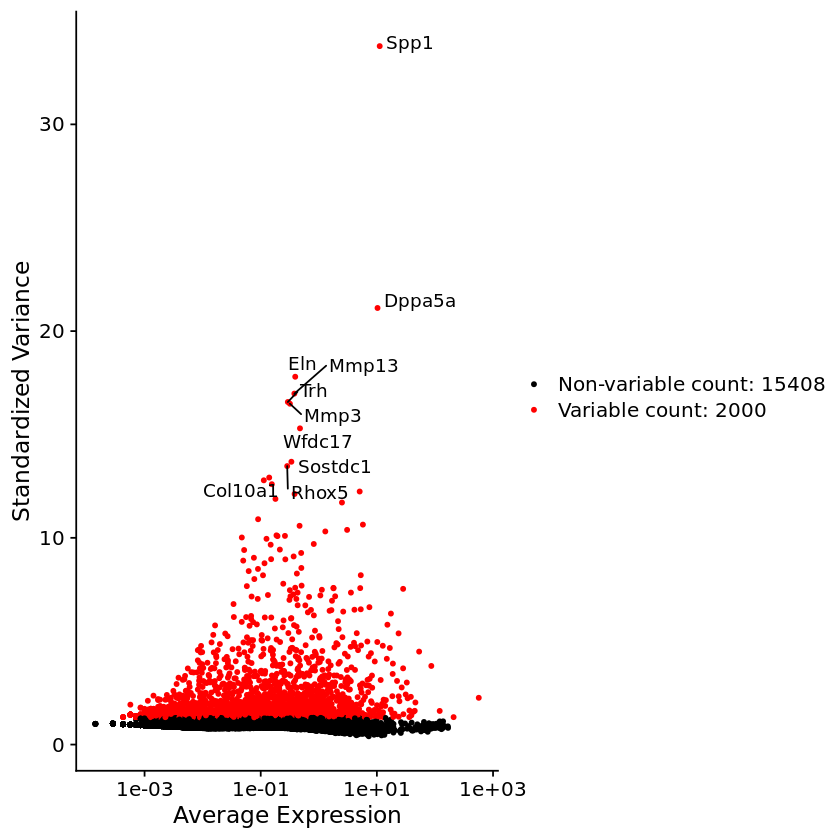

In [12]:
stemcca <- FindVariableFeatures(stemcca, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(stemcca), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(stemcca)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1
plot2

In [13]:
all.genes <- rownames(stemcca)
stemcca <- ScaleData(stemcca, features = all.genes)

Centering and scaling data matrix


In [14]:
stemcca <- RunPCA(stemcca, features = VariableFeatures(object = stemcca))

PC_ 1 
Positive:  Bgn, Cald1, Ahnak, Lgals1, Col1a2, Vim, Serpinh1, Emp1, Sparc, Mgp 
	   Timp2, S100a6, Col4a2, Thy1, Malat1, Fbln2, Col1a1, Igfbp7, Fbn1, Aebp1 
	   Timp3, Serpinf1, S100a11, Col3a1, Ccdc80, Thbs1, Col4a1, Col5a2, Fn1, Col6a3 
Negative:  Utf1, Pou5f1, Dppa5a, Mybl2, Hsp90aa1, Sox2, Fabp3, Trap1a, Tdgf1, Hmgb2 
	   Mkrn1, Rbpms2, Rbmxl2, Dppa4, Bex1, Nasp, Apoc1, Hells, Zfp42, Fam25c 
	   Dnmt3l, Ptma, Sept1, Tet1, Nanog, Hsf2bp, Mylpf, Gm7325, Ran, Gtsf1l 
PC_ 2 
Positive:  Crym, Gstm5, Aldh3a1, Ramp3, Acsbg1, H2afz, Gsta4, Gm15987, Cib2, Pcsk1n 
	   Fxyd6, 0610040J01Rik, Egln3, Dmrtc2, Apela, L1td1, Npm1, Shisa3, Cd59a, Wnk4 
	   Ceacam1, Ano1, Avil, Sox11, Limch1, Mt1, Il34, Dhrs4, Frat2, Dpy30 
Negative:  Col1a1, Tmsb10, Col8a1, Col5a2, Sparc, Igfbp7, Thbs1, Fn1, Col5a1, Lox 
	   Col3a1, Fbln2, Prss23, Loxl1, Col12a1, Col1a2, Itga11, Loxl2, Spp1, Mfap5 
	   Pmepa1, Timp2, Ncam1, Wisp1, Calr, Myl6, Tnc, Fbn1, Wisp2, Timp3 
PC_ 3 
Positive:  2810417H13Rik, Mki67, Tk1

In [15]:
print(stemcca[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  Bgn, Cald1, Ahnak, Lgals1, Col1a2 
Negative:  Utf1, Pou5f1, Dppa5a, Mybl2, Hsp90aa1 
PC_ 2 
Positive:  Crym, Gstm5, Aldh3a1, Ramp3, Acsbg1 
Negative:  Col1a1, Tmsb10, Col8a1, Col5a2, Sparc 
PC_ 3 
Positive:  2810417H13Rik, Mki67, Tk1, Tubb6, Top2a 
Negative:  Kdm5b, Apoe, Aldoc, Dppa5a, Chchd10 
PC_ 4 
Positive:  Mgp, Plvap, Apod, Bgn, Fos 
Negative:  Actg2, Acta2, 2200002D01Rik, Anxa2, Ccnd1 
PC_ 5 
Positive:  Spp1, Capg, Fxyd5, Fndc3a, Angptl2 
Negative:  Gng13, Tnfrsf11b, Sfrp1, Actg2, Gm15866 


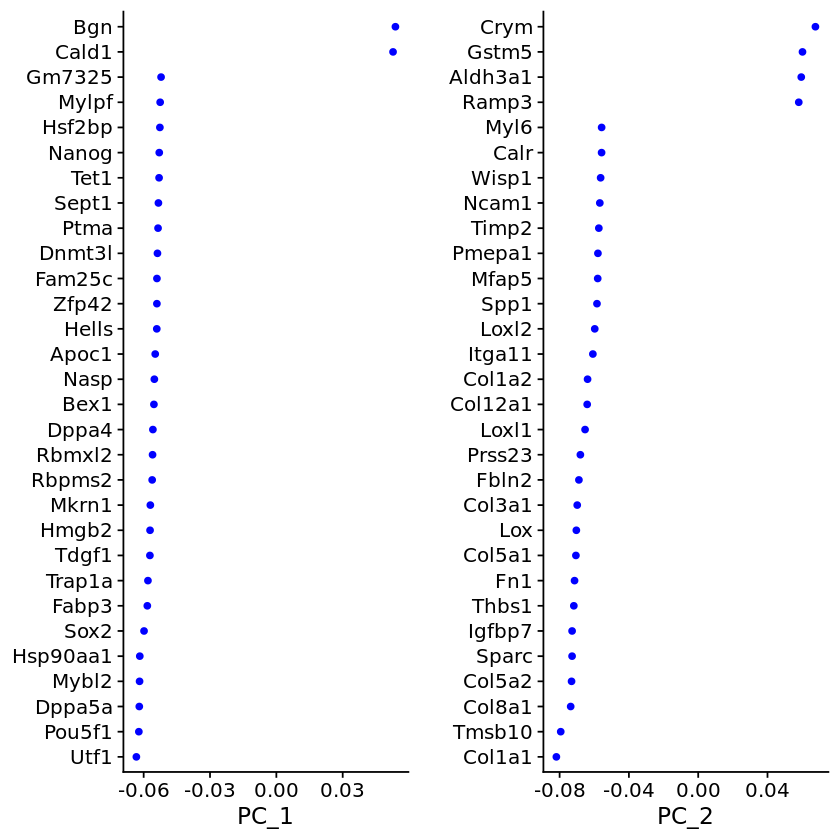

In [16]:
VizDimLoadings(stemcca, dims = 1:2, reduction = "pca")

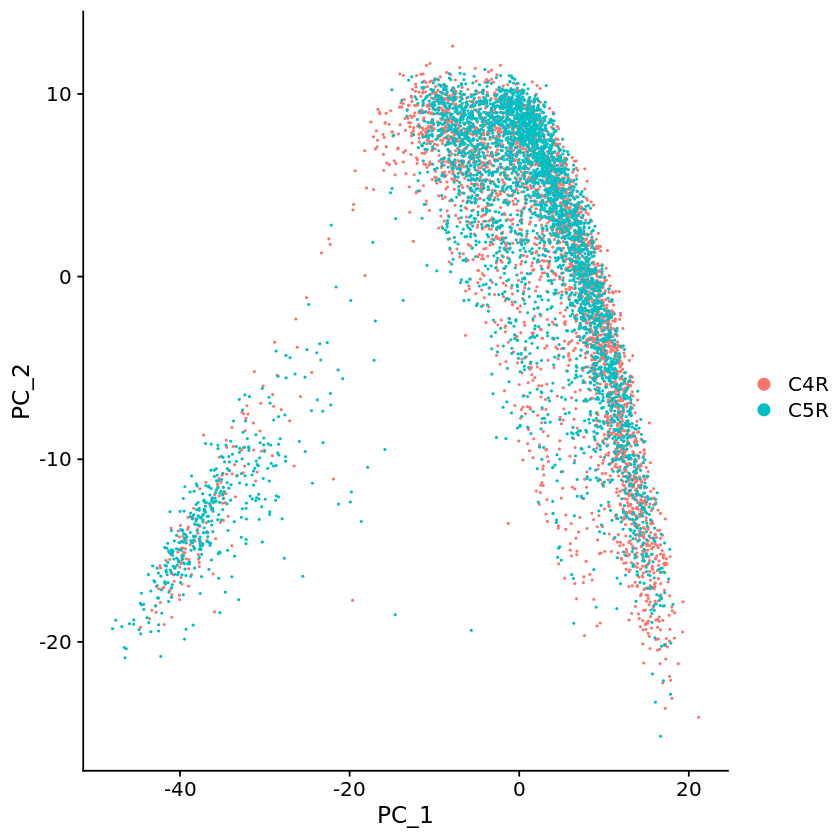

In [17]:
DimPlot(stemcca, reduction = "pca")

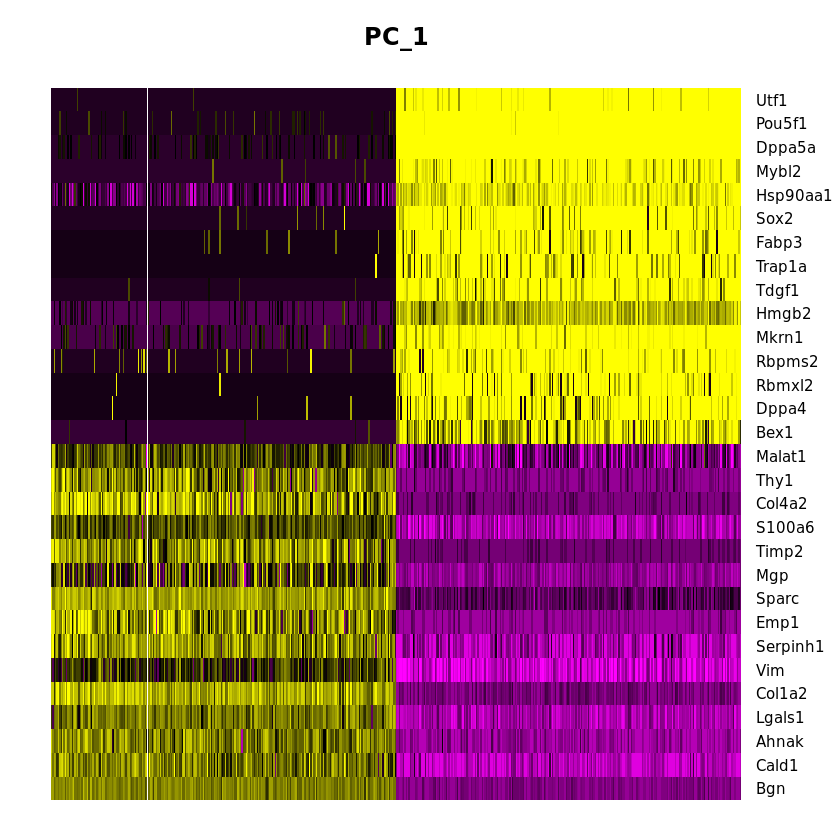

In [18]:
DimHeatmap(stemcca, dims = 1, cells = 500, balanced = TRUE)

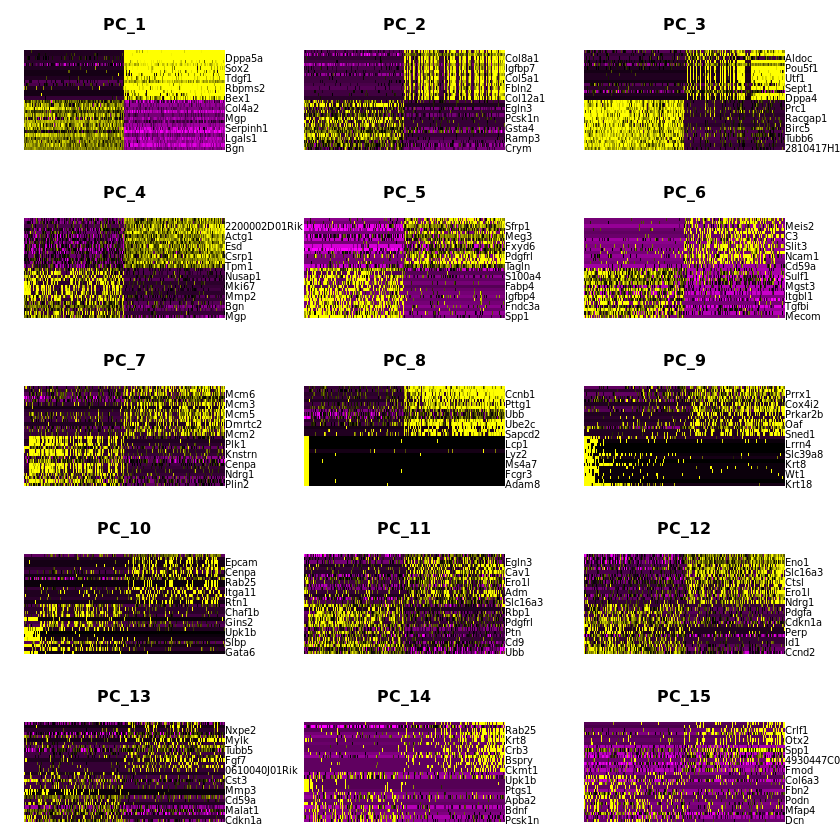

In [19]:
DimHeatmap(stemcca, dims = 1:15, cells = 500, balanced = TRUE)

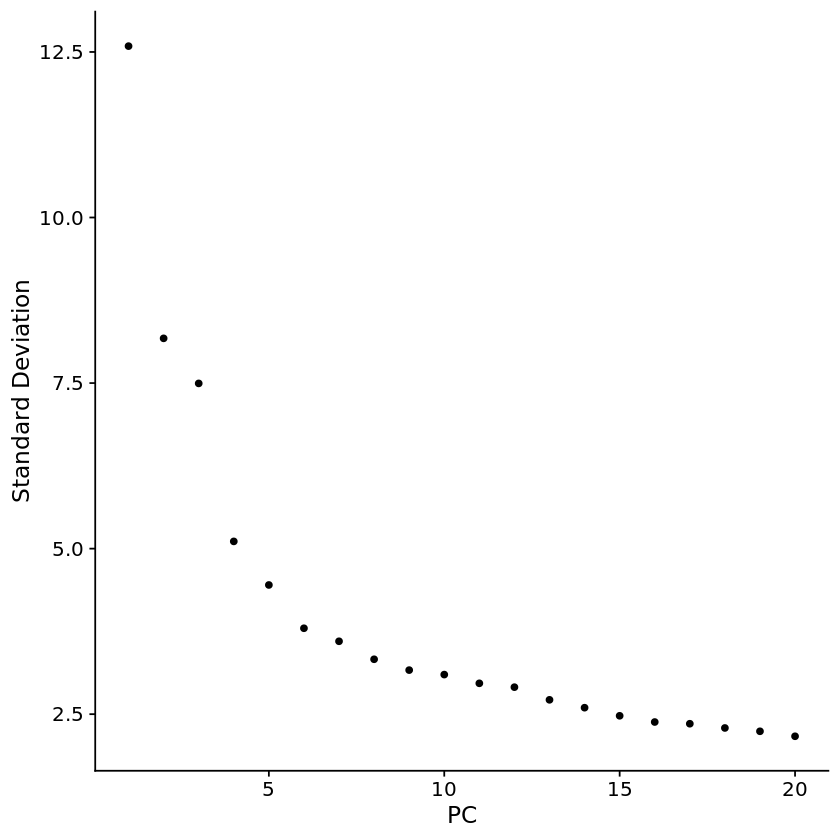

In [20]:
ElbowPlot(stemcca)

In [21]:
stemcca <- RunTSNE(stemcca, dims = 1:10, seed = '123456789')

In [22]:
stemcca <- FindNeighbors(stemcca, dims = 1:10)
stemcca <- FindClusters(stemcca, resolution = 0.2)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7023
Number of edges: 220780

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9131
Number of communities: 7
Elapsed time: 0 seconds


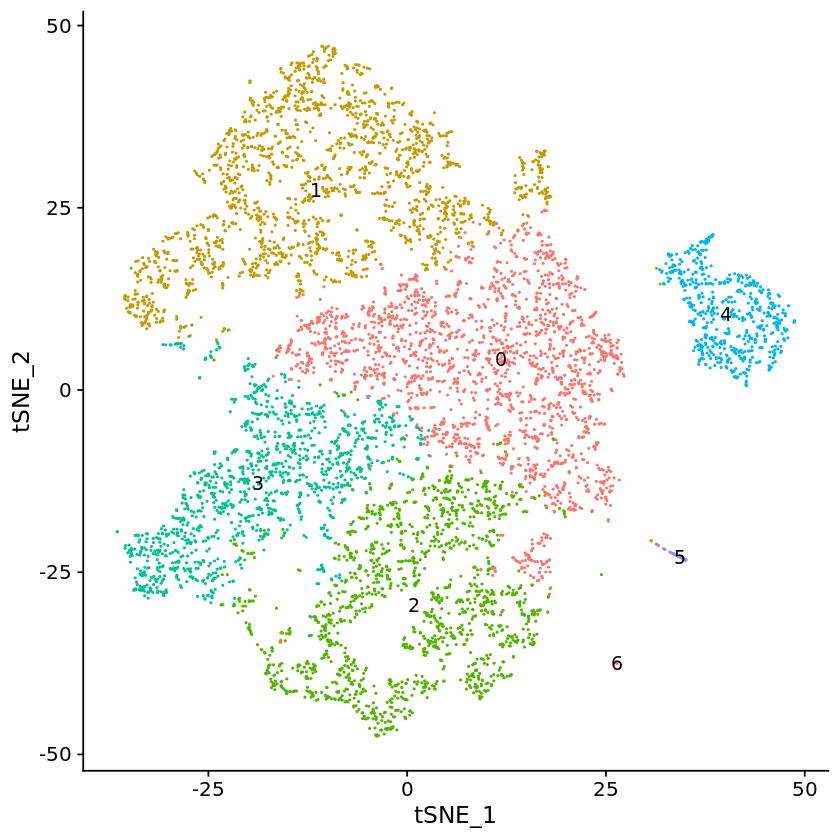

In [23]:
DimPlot(stemcca, reduction = "tsne", label = TRUE) + NoLegend()

In [24]:
# find markers for every cluster compared to all remaining cells, report only the positive ones
stemcca.markers <- FindAllMarkers(stemcca, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6


In [25]:
top1 <- stemcca.markers %>% group_by(cluster) %>% top_n(n = 1, wt = avg_logFC)

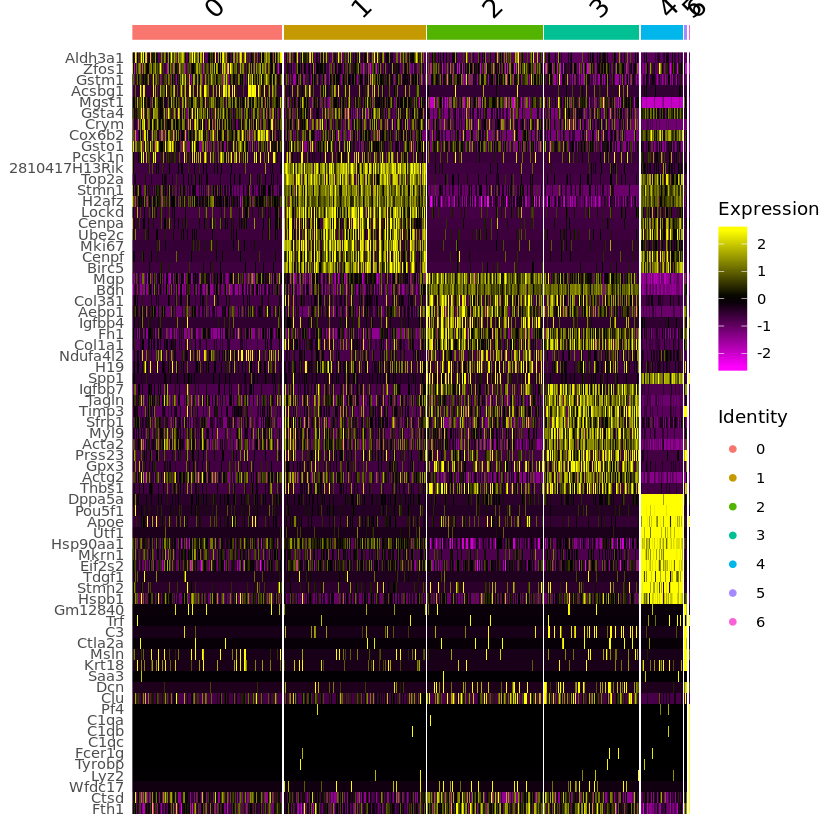

In [26]:
top10 <- stemcca.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
DoHeatmap(stemcca, features = top10$gene)

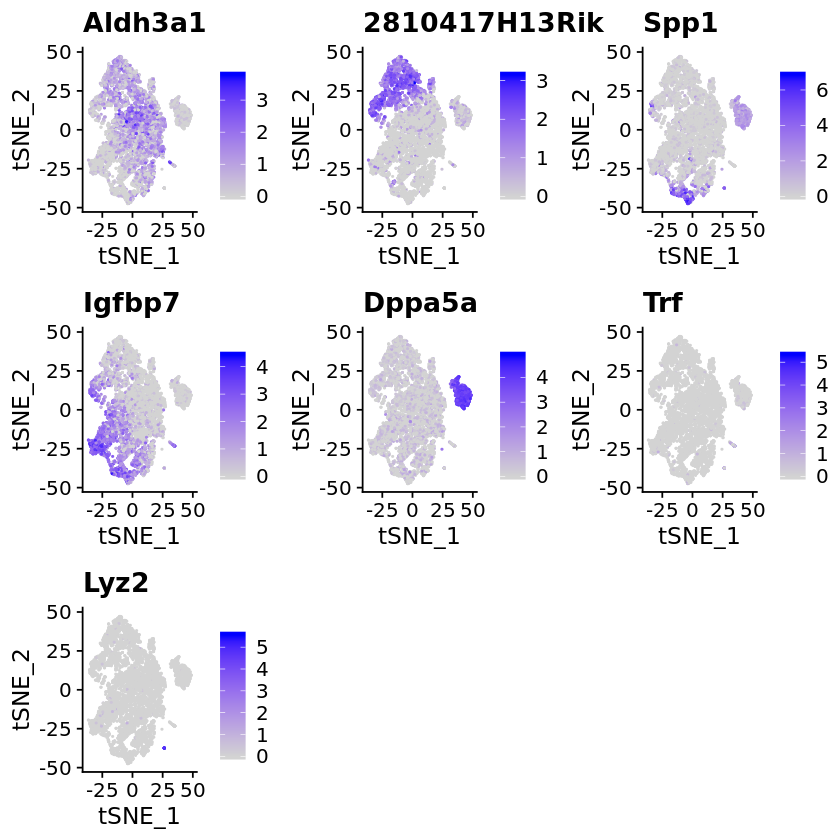

In [27]:
FeaturePlot(stemcca, features = top1$gene)

#### Remove outlier cells and check the effect on clustering. Removing cells from current cluster 5 and 6.

In [28]:
# Get the id of cells in cluster 5 and 6
keep <- rownames(stemcca@meta.data[!(stemcca@meta.data$seurat_clusters %in% c(5,6)),])

In [29]:
stemcca_filt <- subset(stemcca, cells = keep)

In [30]:
stemcca_filt <- RunTSNE(stemcca_filt, dims = 1:10, seed = '123456')

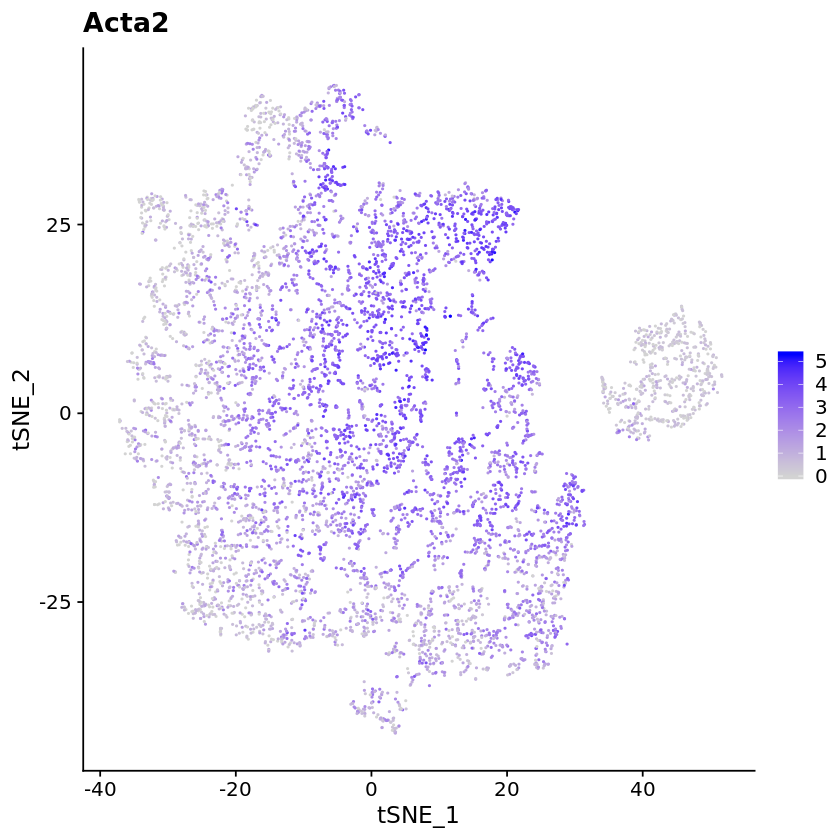

In [31]:
FeaturePlot(stemcca_filt, reduction = "tsne", features = "Acta2")

In [32]:
stemcca_filt <- FindNeighbors(stemcca_filt, dims = 1:10)
stemcca_filt <- FindClusters(stemcca_filt, resolution = 0.15)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6969
Number of edges: 219999

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9245
Number of communities: 4
Elapsed time: 0 seconds


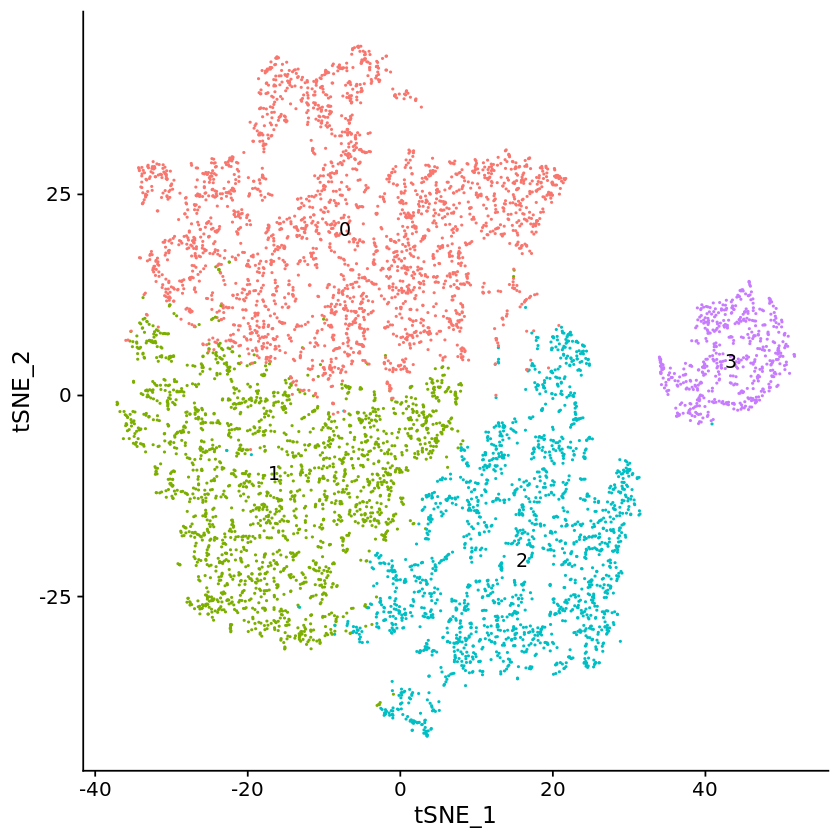

In [33]:
DimPlot(stemcca_filt, reduction = "tsne", label = TRUE) + NoLegend()

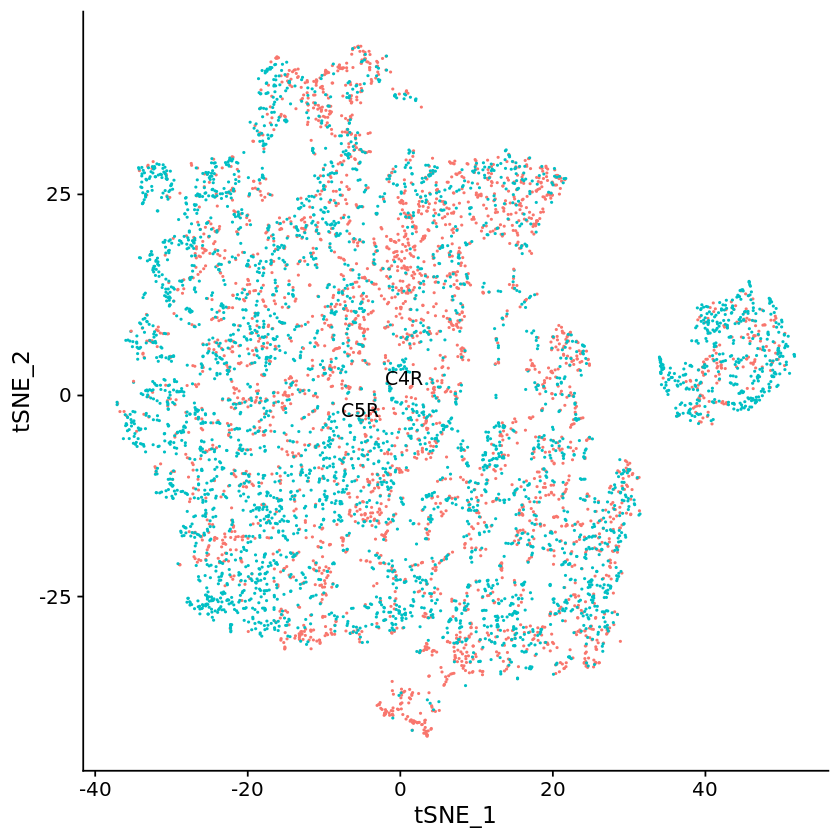

In [34]:
DimPlot(stemcca_filt, reduction = "tsne", group.by="orig.ident", label = TRUE) + NoLegend()

In [121]:
#pdf("AJ_0066.1_tSNE_Project_Clusters.pdf", useDingbats = FALSE)
#DimPlot(stemcca_filt, reduction = "tsne", group.by="orig.ident", label = TRUE) + NoLegend()
#DimPlot(stemcca_filt, reduction = "tsne", label = TRUE) + NoLegend()
#dev.off()

png 
  2

#### Export seurat object and normalized counts

In [40]:
saveRDS(stemcca_filt, "10X_Song/10X_stemcca_filt_seurat.rds")

In [41]:
stemcca_norm_log <- as.matrix(stemcca[["RNA"]]@data)

write.csv(stemcca_norm_log, file = "10X_Song/10X_stemcca_filt_norm_log.csv")

#### Below Not included in the manuscript

In [35]:
# find markers for every cluster compared to all remaining cells, report only the positive ones
stemcca_filt.markers <- FindAllMarkers(stemcca_filt, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3


In [36]:
top3 <- stemcca_filt.markers %>% group_by(cluster) %>% top_n(n = 3, wt = avg_logFC)

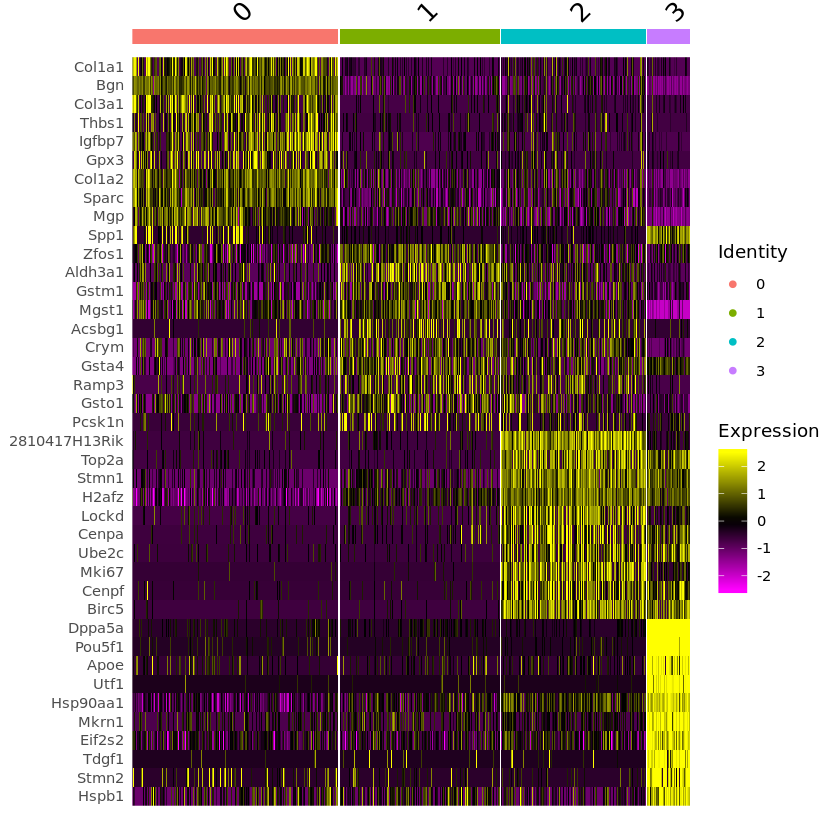

In [37]:
top10 <- stemcca_filt.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
DoHeatmap(stemcca_filt, features = top10$gene)

In [122]:
#pdf("AJ_0066.1_top10_markers_per_cluster.pdf", useDingbats = FALSE)
#DoHeatmap(stemcca_filt, features = top10$gene)
#dev.off()

png 
  2

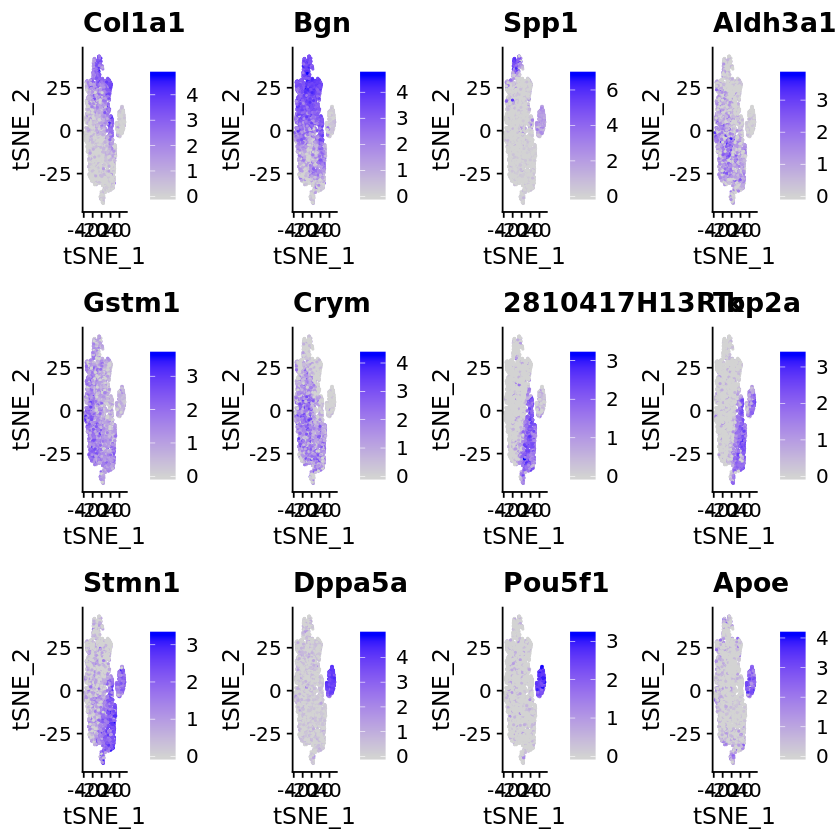

In [38]:
FeaturePlot(stemcca_filt, features = top3$gene)

In [127]:
#pdf("AJ_0066.1_top3_markers_per_cluster_tSNE.pdf", useDingbats = FALSE, width = 15, height = 10)
#FeaturePlot(stemcca_filt, features = top3$gene)
#dev.off()

png 
  2

Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
"The following requested variables were not found: Aspry1"

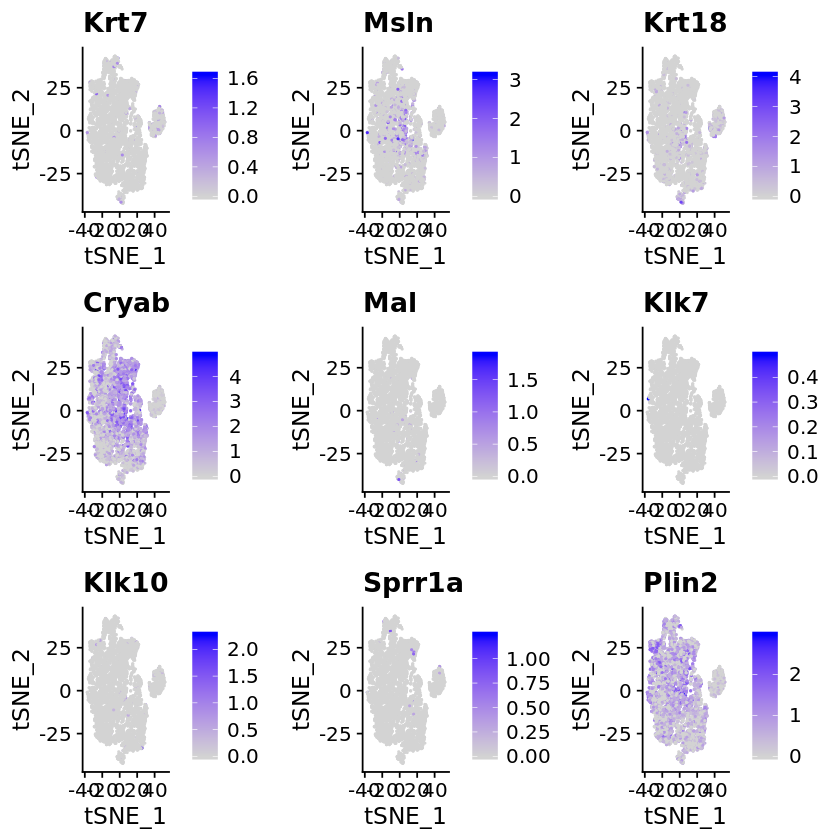

In [39]:
FeaturePlot(stemcca_filt, features = c("Krt7", "Msln","Krt18","Cryab","Mal","Klk7","Klk10","Sprr1a","Plin2","Aspry1"))

In [150]:
#pdf("AJ_0066.1_genes_from_clust5_tSNE.pdf", useDingbats = FALSE, width = 15, height = 10)
#FeaturePlot(stemcca_filt, features = c("Ooep", "Snrpn","Lefty1","Mycn","Prps1","Klhl13","Pim2"))
#dev.off()

png 
  2